In [11]:
using JLD
using Plotly
using WebIO
# link for Plotly account: https://chart-studio.plotly.com/~eyhl

In [12]:
Plotly.set_credentials_file(Dict("username"=>"eyhl","api_key"=>"aAaQP6QOTl2qhdCQ71e4"))

52

In [13]:
dir = "/Users/eyu/local_data/data/lemvig_baselines/"
files = readdir(dir)
index = [ split(elem, ".")[end] == "jld" for elem in files]
files = dir.*files[index];

In [14]:
function f(x, c)
    if abs(x) <= c
        return (1 - abs(x) / c)
    elseif x > c
        return 0
    end
end

f (generic function with 1 method)

In [15]:
T_critical = 1*365
B_critical = 1500
rho_total = Array{Float64, 1}(undef, length(files))
rho_total1 = Array{Float64, 1}(undef, length(files))
rho_total2 = Array{Float64, 1}(undef, length(files))

for file in files
    baseline_dict = JLD.load(file)
    spatial_bl = baseline_dict["baseline"][1]
    temporal_bl = baseline_dict["temporal"][1];
    index = findall(x->x==0, temporal_bl)[1]
    deleteat!(spatial_bl, index)
    deleteat!(temporal_bl, index)
    rho_total[index] = 1/length(files) * sum(f.(spatial_bl, B_critical) .* f.(temporal_bl, T_critical))
end

In [16]:
master_index = argmax(rho_total)#, argmax(rho_total1), argmax(rho_total2)

10

In [17]:
files[master_index]

"/Users/eyu/local_data/data/lemvig_baselines/BASELINE_S1A_IW_SLC__1SDV_20170613T054034_20170613T054102_017011_01C547_641A.jld"

In [18]:
baseline_dict = JLD.load(files[master_index])
spatial_bl = baseline_dict["baseline"][1]
temporal_bl = baseline_dict["temporal"][1];


In [20]:
function linescatter1()
    trace1 = scatter(;x=-temporal_bl[1:end .!= master_index], y=spatial_bl[1:end .!= master_index], 
        mode="markers", name="Baselines", marker_size=12)
    trace2 = scatter(;x=[temporal_bl[master_index]], y=[spatial_bl[master_index]], mode="markers", name="Master",
                                            marker_size=12)
    plot([trace1, trace2])
end
master_selection_plot = linescatter1()

data: [
  "scatter with fields marker, mode, name, type, x, and y",
  "scatter with fields marker, mode, name, type, x, and y"
]

layout: "layout with field margin"

In [10]:
remote_plot = post(master_selection_plot)

RemotePlot(HTTP.URI("https://chart-studio.plotly.com/~eyhl/2"))

In [11]:
scatter(temporal_bl, spatial_bl, xlabel = "Temporal, [d]", ylabel = "Spatial, [m]")

<!DOCTYPE html>
 
 
 Plots.jl

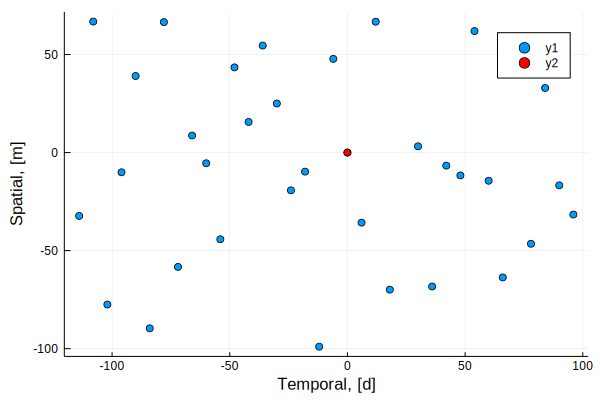

In [9]:
scatter!([temporal_bl[10]...], [spatial_bl[10]...],color="red")


In [177]:
baseline_dict = JLD.load(files[10])
spatial_bl = baseline_dict["baseline"][1]
temporal_bl = baseline_dict["temporal"][1];


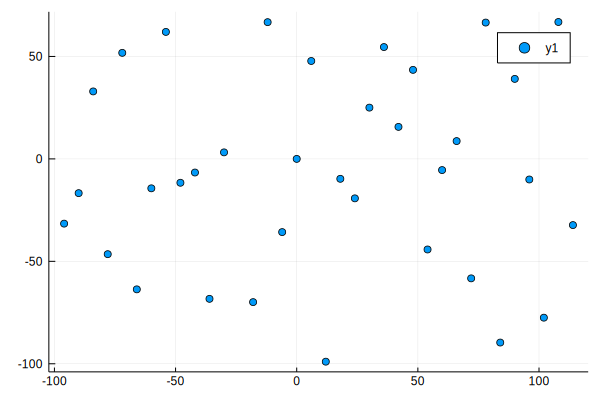

In [178]:
scatter(temporal_bl, spatial_bl)

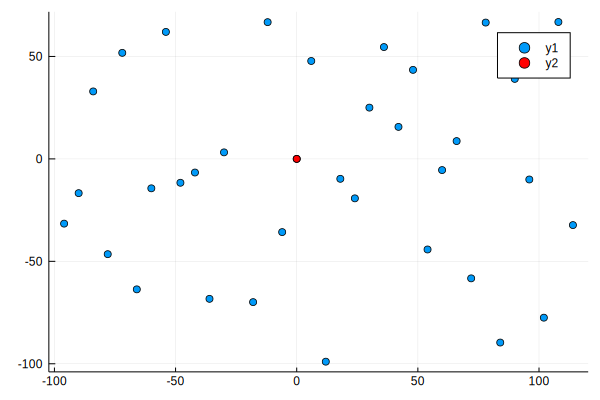

In [179]:
scatter!([temporal_bl[10]...], [spatial_bl[10]...],color="red")

In [165]:
temporal_bl[34], spatial_bl[34]

(0, 0.0)

In [87]:
spatial_bl = baselines["baseline"][1]
temporal_bl = baselines["temporal"][1];

In [88]:
deleteat!(temporal_bl, findall(x->x==0, temporal_bl))

1-element Array{Int64,1}:
 1

In [91]:
findall(x->x==0, temporal_bl)[1]

1

In [36]:
1 .- min.(spatial_bl[2:end]/1000, 1)

35.886064471603206

In [35]:
1 .- min.(temporal_bl[2:end]/730, 1)

34-element Array{Float64,1}:
 1.0164383561643835
 1.0328767123287672
 1.0493150684931507
 1.0657534246575342
 1.0821917808219177
 1.0986301369863014
 1.115068493150685 
 1.1315068493150684
 1.1479452054794521
 1.1643835616438356
 1.1972602739726028
 1.2136986301369863
 1.2301369863013698
 ⋮                 
 1.0904109589041096
 1.106849315068493 
 1.1232876712328768
 1.1397260273972603
 1.1561643835616437
 1.1726027397260275
 1.189041095890411 
 1.2054794520547945
 1.2219178082191782
 1.2383561643835617
 1.2547945205479452
 1.2712328767123289

In [39]:
sum((1 .- min.(temporal_bl[2:end]/730, 1)).*(1 .- min.(spatial_bl[2:end]/1000, 1)))

40.835423352504634

In [147]:
2==2 ? 3==2 : 4

false

In [ ]:
T_critical = 2*365
B_critical = 5000
rho_total = Array{Float64, 1}(undef, length(files))
rho_total1 = Array{Float64, 1}(undef, length(files))
rho_total2 = Array{Float64, 1}(undef, length(files))

for file in files
    baseline_dict = JLD.load(file)
    spatial_bl = baseline_dict["baseline"][1]
    temporal_bl = baseline_dict["temporal"][1];
    index = findall(x->x==0, temporal_bl)[1]
    rho_total[index] = sum((1 .- min.(abs.(temporal_bl)/T_critical, 1)).*(1 .- min.(abs.(spatial_bl)/B_critical, 1)))
    rho_total1[index] = sum(1 .- min.(abs.(temporal_bl)/T_critical, 1))*sum(1 .- min.(abs.(spatial_bl)/B_critical, 1))
    rho_total2[index] = sum(1 .- min.((temporal_bl)/T_critical, 1))*sum(1 .- min.((spatial_bl)/B_critical, 1))

end